## **Question 1**

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_excel('data_q1.xlsx',usecols=(0,1))
#df.head()

In [3]:
dfY=pd.read_excel('data_q1.xlsx',usecols=(2,2))
#dfY.head()

In [4]:
pX=df.max()
df=df/pX

pY=dfY.max()
dfY=dfY/pY

In [5]:
import math

ones=np.ones((df.shape[0],1))
df=np.hstack((ones,df))


def divide_tr_te(df,dfY):
  x=df[:math.floor(0.7*df.shape[0])]
  x_te=df[math.floor(0.7*df.shape[0]):]

  y=dfY[:math.floor(0.7*df.shape[0])]
  y_te=dfY[math.floor(0.7*df.shape[0]):]
  return x,x_te,y,y_te

x,x_te,y,y_te=divide_tr_te(df,dfY)
print(x.shape)
print(x_te.shape)

(80, 3)
(35, 3)


In [6]:
m=x.shape[0]
m

80

In [7]:
x.shape

(80, 3)

In [8]:
y.shape

(80, 1)

In [9]:
def initialise_w():
  w=np.zeros((x.shape[1],1))
  return w

In [10]:
w=initialise_w()

In [11]:
w

array([[0.],
       [0.],
       [0.]])

In [12]:
def calc_cost_func(x,y,w):
  j=1/(2*m) * np.sum(((x @ w) - y)**2)
  return j

In [13]:
calc_cost_func(x,y,w)

Output    0.368679
dtype: float64

In [14]:
def batch_gradient_descent(x,y,w,alpha,itr):
  j_history=np.zeros((itr,1))
  
  for i in range(itr):
    j_history[i]=calc_cost_func(x,y,w)
    w=w - (alpha/m) * x.T @ (x @ w - y)

  return (j_history,w)

In [15]:
w=initialise_w()
j_history,w=batch_gradient_descent(x,y,w,0.1,100)

In [16]:
#j_history

In [17]:
w

,Output
0,0.386110
1,0.143719
2,0.412174


Text(0, 0.5, 'Cost')

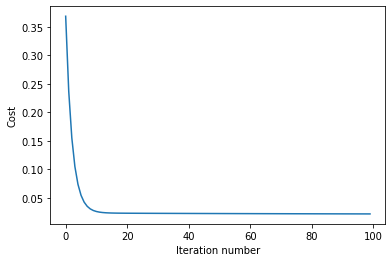

In [18]:
import matplotlib.pyplot as plt

plt.plot(range(len(j_history)), j_history)
plt.xlabel('Iteration number')
plt.ylabel('Cost')

In [19]:
y_predicted=x_te @ w
msq=np.sum((y_predicted-y_te)**2)/y_te.shape[0]

In [20]:
msq

Output    0.0
dtype: float64

Stochastic Gradient Descent (SGD)

In [21]:
#stochastic gradient descent (SGD)

import random

def stochastic_gradient_descent(df,dfY,w,alpha,iter):
  j_history=np.zeros((iter,1))
  temp_df=np.copy(df)
  for i in range(iter):
    np.random.shuffle(temp_df)
    index=random.randint(0,m-1)
    x_temp=temp_df[index]
    y_temp=dfY.iloc[index]
    j_history[i]=calc_cost_func(x,y,w)
    temp=(x_temp @ w - y_temp)
    w=w-alpha*(x_temp.reshape(-1,1) * temp[0])
  return j_history,w

In [22]:
dfY.iloc[10,0]

1.0

In [23]:
w=initialise_w()
w

array([[0.],
       [0.],
       [0.]])

In [24]:
w=initialise_w()
j_history,w=stochastic_gradient_descent(df,dfY,w,0.1,100)
# j_history

Text(0, 0.5, 'Cost')

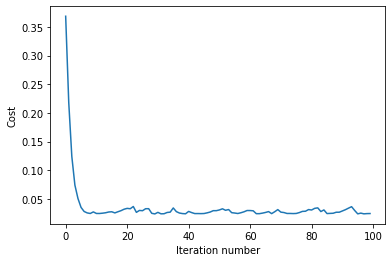

In [25]:
plt.plot(range(len(j_history)), j_history)
plt.xlabel('Iteration number')
plt.ylabel('Cost')

mini-batch gradient descent (MBGD)

In [26]:
def mini_batch_gradient_descent(tr,w,alpha,itr,nb):
  

  j_history=np.zeros((itr,1))
  temp_tr=np.copy(tr)
  for i in range(itr):
    np.random.shuffle(temp_tr)
    sub_tr=temp_tr[:nb]
    x2,y2=np.hsplit(sub_tr,[sub_tr.shape[1]-1])
    # print(f"x2 {x2.shape} y2 {y2.shape}")
    j_history[i]=calc_cost_func(x2,y2,w)
    w=w - (alpha/m) * x2.T @ (x2 @ w - y2)

  return (j_history,w)

In [27]:
w=initialise_w()
def data_for_mbgd():
  full=pd.read_excel('data_q1.xlsx')
  ones=np.ones((full.shape[0],1))
  full=np.hstack((ones,full))
  tr=full[:math.floor(0.7*df.shape[0])]
  te=full[math.floor(0.7*df.shape[0]):]
  return tr,te

tr,te=data_for_mbgd()
# x2,y2=np.hsplit(tr,[tr.shape[1]-1])
# print(f"x2 {x2.shape} y2 {y2.shape}")
j_history,w=mini_batch_gradient_descent(tr,w,0.1,100,20)
# j_history

Text(0, 0.5, 'Cost')

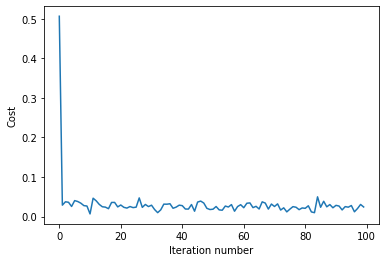

In [28]:
plt.plot(range(len(j_history)), j_history)
plt.xlabel('Iteration number')
plt.ylabel('Cost')